<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-processing" data-toc-modified-id="Image-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image processing</a></span><ul class="toc-item"><li><span><a href="#Task-1:" data-toc-modified-id="Task-1:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task 1:</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Visualizing-the-location-of-cursor" data-toc-modified-id="Visualizing-the-location-of-cursor-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Visualizing the location of cursor</a></span></li><li><span><a href="#Exporting-a-video-file" data-toc-modified-id="Exporting-a-video-file-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Exporting a video file</a></span></li><li><span><a href="#Average-location-of-cursor" data-toc-modified-id="Average-location-of-cursor-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Average location of cursor</a></span></li><li><span><a href="#Visualizing-the-heatmap" data-toc-modified-id="Visualizing-the-heatmap-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Visualizing the heatmap</a></span></li></ul></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></div>

# Image processing 

## Task 1: 
### Reading data
you are given a text file `mousePos.txt` which contain the `(x,y)` position of a mouse cursor. Extract the data of the cursor positions in an automated manner.

In [3]:
import os
import io
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mousePOS.txt', sep="\s+| |,|:", header=None, engine="python")
data.columns = ["Iteration", "i_col", "I", "i_com", "TimeStamp", "t_col", "RealTime", "t_com", "MouseEvent", "m_col", "x", "X_pos", "y", "Y_pos", "screen", "ScreenNo", "window", "WindowID"]

Time = data.RealTime
X = data.X_pos
Y = data.Y_pos
S = data.ScreenNo
W = data.WindowID

### Visualizing the location of cursor 
❓ Visualize the current and the last 20 positions of the cursor with the image `Desktop.png` as a background image.

(1080, 3840, 3)


Text(0, 0.5, 'Y')

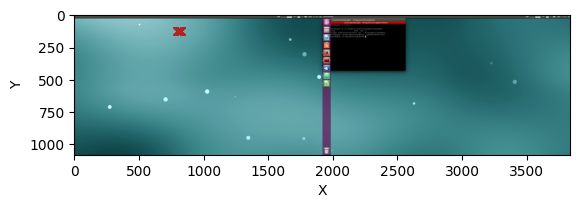

In [86]:
npos=len(Time)
X_last = X[npos-20:npos]
Y_last = Y[npos-20:npos]
img = plt.imread("Desktop.png")
fig, ax = plt.subplots()
ax.imshow(img)  
print(img.ndim)
print(img.shape)  # Image dimesion: 1080x3840
ax.plot(X_last, Y_last, 'x', linewidth=1, color='firebrick')
plt.xlabel('X')
plt.ylabel('Y')

### Exporting a video file
❓ Export the results of the previous task into a vidoe file

In [170]:
# First generate the figures of the last twenty events
print('Generating figures ...')
img = plt.imread("Desktop.png")
t_last = 20
i = 0
fig, ax = plt.subplots()
while (t_last > 0):
    X_curr = X[npos-t_last]
    Y_curr = Y[npos-t_last]
    ax.imshow(img)
    ax.plot(X_curr, Y_curr, 'x', linewidth=1, color='firebrick')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(f'mouse_pos_{t_last:02d}.png')
    plt.cla()
    i = i+1
    t_last = t_last-1

plt.close('all')

# Then generate the video 
print('Generating video ...')
image_folder = 'C:/Users/Administrator/PycharmProjects/ixpaudio/ixpimage'
video_name = 'task1_video.avi'
images = [img for img in os.listdir(image_folder) if img.startswith("mouse_pos_")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 1, (width,height))
for image in images:
    print(image)
    video.write(cv2.imread(os.path.join(image_folder, image)))
cv2.destroyAllWindows()
video.release()

print('DONE.')

Generating figures ...
Generating video ...
mouse_pos_01.png
mouse_pos_02.png
mouse_pos_03.png
mouse_pos_04.png
mouse_pos_05.png
mouse_pos_06.png
mouse_pos_07.png
mouse_pos_08.png
mouse_pos_09.png
mouse_pos_10.png
mouse_pos_11.png
mouse_pos_12.png
mouse_pos_13.png
mouse_pos_14.png
mouse_pos_15.png
mouse_pos_16.png
mouse_pos_17.png
mouse_pos_18.png
mouse_pos_19.png
mouse_pos_20.png


### Average location of cursor
❓ Calcualte the average positon of the cursor, and save the content into csv file with proper header. 

***repeate the process 10 times and visualize the average cursor position***

In [226]:
X_avg = np.mean(X)
Y_avg = np.mean(Y)
df = pd.DataFrame({'x_avg': [X_avg], 'y_avg': [Y_avg]})
df.to_csv('task1_avg.csv', index=False, sep = ',')

# Here we repeat the process 10 times, each time averaging across 100 events from the begining (i.e., 10 moving windows)
L = 100  # Window length
X_mov_avg = np.zeros(shape=(10,1), dtype=float)
Y_mov_avg = np.zeros(shape=(10,1), dtype=float)
for i in range(1,10):
    a = (i-1)*L+1
    b = a+L
    X_mov_avg[i] = np.mean(X[a:b])
    Y_mov_avg[i] = np.mean(Y[a:b])
data = np.concatenate((X_mov_avg, Y_mov_avg), axis=1)
df = pd.DataFrame(data, columns=['x_avg','y_avg'])
df.to_csv('task1_mov_avg.csv', index=False, sep = ',')
print(df)

     x_avg   y_avg
0     0.00    0.00
1  2614.99  454.00
2  2317.59  410.02
3  3306.88  437.15
4  2370.22  384.72
5  1183.26  322.56
6   789.64  611.94
7  1592.60  708.33
8  2264.97  746.40
9  2800.66  347.32


### Visualizing the heatmap
❓ Calculate and visualize a Heatmap, stating the amount of time spent in each location. 

💡  
As an example you can look at 'Heatmap_example.jpg'.
    ![](./Heatmap_example.jpg)  




Text(0, 0.5, 'Y')

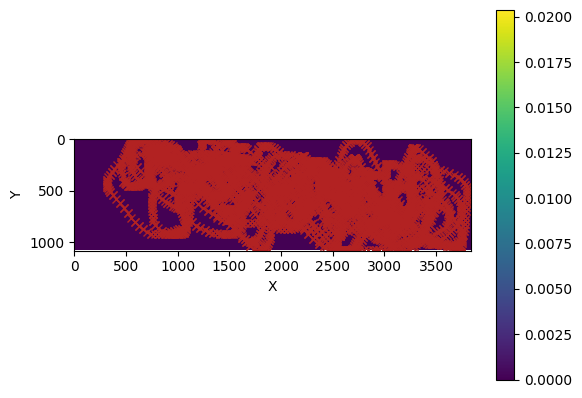

In [299]:
Time_diff = pd.Series.diff(Time)  # Should all be positive values
Time_diff = np.nan_to_num(Time_diff, nan=0)

Z = np.zeros(shape=(1080,3840))
Z[Y,X] = Time_diff

fig, ax = plt.subplots()
plt.imread("Desktop.png")
plt.imshow(Z)
plt.colorbar(orientation='vertical')
ax.plot(X, Y, 'x', linewidth=1, color='firebrick')
plt.xlabel('X')
plt.ylabel('Y')

## Task 2


Draw a box `(side length 20cm)` around the position of the head in `face.jpg`  
![face.png](./face.png)

Camera parameters are `cx=250, cy=375, fx=fy=716`.  
Head position is (in mm relative to camera) `(212, -168, 712)` with rotation (Rodrigues) `(.35, .59, -.30)`.  
For more information look the documention of [openCV](https://docs.opencv.org/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html).  

Save the overlayed image. The result should look like `face_example.jpg`, 
**make sure to choose thinner lines**


In [5]:
src = cv2.imread('face.jpg')
source_window = 'Source'
cv2.namedWindow(source_window)
cv2.imshow(source_window, src)
cv2.waitKey(0)  # Keep image open on notebook
cv2.destroyAllWindows()
# I do not know how to continue from here!